### Initial

In [1]:
from theano.sandbox import cuda

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


In [2]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

Using Theano backend.


In [3]:
path = "data/fish/"
batch_size=64

In [4]:
homeDir = os.getcwd()
dataHome = homeDir + "/data/fish/"
dataDir = homeDir + "/data/fish/"
train_path = dataDir + "train/"
valid_path = dataDir + "valid/"
model_path = dataDir + "models/"
test_path = dataHome + "test/"
results_path = dataDir + "results/"

### Making validation set

In [4]:
%cd data/fish
%cd train
%mkdir ../valid

/home/ubuntu/KaggleCompetitions/Fisheries/data/fish
/home/ubuntu/KaggleCompetitions/Fisheries/data/fish/train


In [6]:
g = glob('*')
for d in g: os.mkdir('../valid/'+d)

In [10]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(500):
    os.rename(shuf[i], '../valid/'+ shuf[i])

### Setting up the model

In [5]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [6]:
raw_filenames = [f.split('/')[-1] for f in filenames]
raw_test_filenames = [f.split('/')[-1] for f in test_filenames]
raw_val_filenames = [f.split('/')[-1] for f in val_filenames]

In [7]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(8)

In [6]:
trn = get_data(path+'train')
val = get_data(path+'valid')

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [7]:
test = get_data(path+'test')

Found 1000 images belonging to 1 classes.


In [9]:
save_array(path+'results/trn.dat', trn)
save_array(path+'results/val.dat', val)

In [10]:
save_array(path+'results/test.dat', test)

In [8]:
trn = load_array(path+'results/trn.dat')
val = load_array(path+'results/val.dat')

In [9]:
test = load_array(path+'results/test.dat')

In [14]:
model.compile(optimizer=Adam(1e-3),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=5, 
          validation_data=(val, val_labels), verbose=2)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Train on 3277 samples, validate on 500 samples
Epoch 1/5
96s - loss: 2.9740 - acc: 0.4779 - val_loss: 1.2119 - val_acc: 0.6860
Epoch 2/5
98s - loss: 1.6539 - acc: 0.6427 - val_loss: 0.7753 - val_acc: 0.7920
Epoch 3/5
98s - loss: 1.2755 - acc: 0.7153 - val_loss: 0.5389 - val_acc: 0.8300
Epoch 4/5
98s - loss: 1.0629 - acc: 0.7577 - val_loss: 0.4657 - val_acc: 0.8660
Epoch 5/5
99s - loss: 0.9931 - acc: 0.7635 - val_loss: 0.4473 - val_acc: 0.8840


In [16]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, 
          validation_data=(val, val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
98s - loss: 0.8339 - acc: 0.7888 - val_loss: 0.3685 - val_acc: 0.9080
Epoch 2/3
98s - loss: 0.8624 - acc: 0.7888 - val_loss: 0.3385 - val_acc: 0.9100
Epoch 3/3
98s - loss: 0.8059 - acc: 0.8096 - val_loss: 0.3607 - val_acc: 0.9100


In [17]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, 
          validation_data=(val, val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
97s - loss: 0.7463 - acc: 0.8126 - val_loss: 0.3076 - val_acc: 0.9180
Epoch 2/3
98s - loss: 0.7255 - acc: 0.8135 - val_loss: 0.3518 - val_acc: 0.9020
Epoch 3/3
98s - loss: 0.6974 - acc: 0.8172 - val_loss: 0.3359 - val_acc: 0.9240


In [24]:
model.compile(optimizer=Adam(1e-4),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, 
          validation_data=(val, val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
96s - loss: 0.6128 - acc: 0.8367 - val_loss: 0.2860 - val_acc: 0.9320
Epoch 2/3
98s - loss: 0.6411 - acc: 0.8264 - val_loss: 0.2829 - val_acc: 0.9280
Epoch 3/3
98s - loss: 0.5597 - acc: 0.8465 - val_loss: 0.2798 - val_acc: 0.9300


In [30]:
layers= model.layers
dense_layer_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense]
layers[dense_layer_idx[-2]].trainable = True

In [31]:
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, 
          validation_data=(val, val_labels), verbose=2)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Train on 3277 samples, validate on 500 samples
Epoch 1/3
97s - loss: 0.6793 - acc: 0.8474 - val_loss: 0.3293 - val_acc: 0.9320
Epoch 2/3
98s - loss: 0.4383 - acc: 0.9005 - val_loss: 0.1737 - val_acc: 0.9620
Epoch 3/3
99s - loss: 0.2782 - acc: 0.9310 - val_loss: 0.2117 - val_acc: 0.9720


In [35]:
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, 
          validation_data=(val, val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
97s - loss: 0.1738 - acc: 0.9612 - val_loss: 0.2008 - val_acc: 0.9720
Epoch 2/3
98s - loss: 0.1619 - acc: 0.9573 - val_loss: 0.1944 - val_acc: 0.9700
Epoch 3/3
99s - loss: 0.1225 - acc: 0.9670 - val_loss: 0.2090 - val_acc: 0.9740


### Precompute conv layers output

In [10]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [11]:
conv_model = Sequential(conv_layers)

In [41]:
conv_feat = conv_model.predict(trn)
conv_val_feat = conv_model.predict(val)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


In [42]:
conv_test_feat = conv_model.predict(test)

In [43]:
save_array(path+'results/conv_val_feat.dat', conv_val_feat)
save_array(path+'results/conv_feat.dat', conv_feat)

In [44]:
save_array(path+'results/conv_test_feat.dat', conv_test_feat)

In [12]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')

In [13]:
conv_test_feat = load_array(path+'results/conv_test_feat.dat')

In [14]:
conv_val_feat.shape

(500, 512, 14, 14)

### Simple Fc layer model

In [50]:
def get_bn_layers(p):
    return[
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(8, activation='softmax')
    ]
    

In [55]:
bn_model = Sequential(get_bn_layers(0.6))
bn_model.compile(Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
bn_model.fit(conv_feat,trn_labels,batch_size=batch_size,
            nb_epoch=3, validation_data=(conv_val_feat,val_labels), verbose=2)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Train on 3277 samples, validate on 500 samples
Epoch 1/3
2s - loss: 1.1399 - acc: 0.6698 - val_loss: 0.7395 - val_acc: 0.8660
Epoch 2/3
2s - loss: 0.3357 - acc: 0.9042 - val_loss: 0.1693 - val_acc: 0.9540
Epoch 3/3
2s - loss: 0.1622 - acc: 0.9524 - val_loss: 0.0858 - val_acc: 0.9720


In [57]:
bn_model.optimizer.lr = 1e-5
bn_model.fit(conv_feat,trn_labels,batch_size=batch_size,
            nb_epoch=5, validation_data=(conv_val_feat,val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/5
2s - loss: 0.1134 - acc: 0.9670 - val_loss: 0.0857 - val_acc: 0.9740
Epoch 2/5
2s - loss: 0.0730 - acc: 0.9829 - val_loss: 0.0946 - val_acc: 0.9740
Epoch 3/5
2s - loss: 0.0765 - acc: 0.9786 - val_loss: 0.0907 - val_acc: 0.9780
Epoch 4/5
2s - loss: 0.0418 - acc: 0.9881 - val_loss: 0.1038 - val_acc: 0.9820
Epoch 5/5
2s - loss: 0.0542 - acc: 0.9850 - val_loss: 0.1149 - val_acc: 0.9720


In [64]:
bn_model.save_weights(results_path + 'fcLayers1.h5')

### Bounding boxes & multi output

In [16]:
import ujson as json

In [17]:
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']
annos_path = dataDir + 'annos/'

In [18]:
bb_json = {}
for c in anno_classes:
    j = json.load(open('{}{}_labels.json'.format(annos_path,c) , 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1] 
            # If multiple fishes are there select ony one box

In [19]:
bb_json['img_04908.jpg']

{u'class': u'rect',
 u'height': 246.75000000000074,
 u'width': 432.8700000000013,
 u'x': 465.3000000000014,
 u'y': 496.32000000000147}

In [20]:
file2idx = {o:i for i,o in enumerate(raw_filenames)}
val_file2idx = {o:i for i,o in enumerate(raw_val_filenames)}

In [21]:
empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.} # For any bb's missing

In [22]:
for f in raw_filenames:
    if f not in bb_json.keys():
        bb_json[f] = empty_bbox
for f in raw_val_filenames:
    if f not in bb_json.keys():
        bb_json[f] = empty_bbox        

In [23]:
bb_params = ['height', 'width', 'x', 'y']
def convert_bb(bb, size):
    bb = [bb[p] for p in bb_params]
    conv_x = (224. / size[0])
    conv_y = (224. / size[1])
    bb[0] = bb[0]*conv_y
    bb[1] = bb[1]*conv_x
    bb[2] = max(bb[2]*conv_x, 0)
    bb[3] = max(bb[3]*conv_y, 0)
    return bb

#### Sizes

In [24]:
sizes = [PIL.Image.open(train_path+f).size for f in filenames]
id2size = list(set(sizes))
size2id = {o:i for i,o in enumerate(id2size)}

In [25]:
import collections
collections.Counter(sizes)

Counter({(1192, 670): 166,
         (1244, 700): 26,
         (1276, 718): 190,
         (1280, 720): 1874,
         (1280, 750): 538,
         (1280, 924): 46,
         (1280, 974): 348,
         (1334, 750): 27,
         (1518, 854): 35,
         (1732, 974): 27})

In [26]:
trn_sizes_orig = to_categorical([size2id[o] for o in sizes], len(id2size))
raw_val_sizes = [PIL.Image.open(path+'valid/'+f).size for f in val_filenames]
val_sizes = to_categorical([size2id[o] for o in raw_val_sizes], len(id2size))
trn_sizes = trn_sizes_orig-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)
val_sizes = val_sizes-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)

#### Next

In [27]:
trn_bbox = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_filenames, sizes)], 
                   ).astype(np.float32)
val_bbox = np.stack([convert_bb(bb_json[f], s) 
                   for f,s in zip(raw_val_filenames, raw_val_sizes)]).astype(np.float32)

In [28]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(i):
    bb = val_bbox[i]
    plot(val[i])
    plt.gca().add_patch(create_rect(bb))

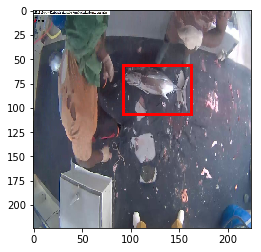

In [29]:
show_bb(100)

### Multi-output model

In [30]:
p=0.6

In [31]:
inp = Input(conv_layers[-1].output_shape[1:])
x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/2)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p*1.2)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x_bb = Dense(4, name='bb')(x)
x_class = Dense(8, activation='softmax', name='class')(x)

In [32]:
model = Model([inp], [x_bb, x_class])
model.compile(Adam(lr=0.0001), loss=['mse', 'categorical_crossentropy'], metrics=['accuracy'],
             loss_weights=[.001, 1.])

In [33]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
2s - loss: 7.9205 - bb_loss: 5124.7880 - class_loss: 2.7957 - bb_acc: 0.2637 - class_acc: 0.2551 - val_loss: 6.3397 - val_bb_loss: 5107.0457 - val_class_loss: 1.2327 - val_bb_acc: 0.3120 - val_class_acc: 0.6480
Epoch 2/3
2s - loss: 6.8896 - bb_loss: 5105.2934 - class_loss: 1.7843 - bb_acc: 0.3290 - class_acc: 0.4666 - val_loss: 5.7158 - val_bb_loss: 5059.5030 - val_class_loss: 0.6563 - val_bb_acc: 0.5560 - val_class_acc: 0.8240
Epoch 3/3
2s - loss: 6.4467 - bb_loss: 5091.6414 - class_loss: 1.3551 - bb_acc: 0.3653 - class_acc: 0.5752 - val_loss: 5.4420 - val_bb_loss: 5046.9330 - val_class_loss: 0.3951 - val_bb_acc: 0.5880 - val_class_acc: 0.8920


In [34]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/10
2s - loss: 6.0711 - bb_loss: 5076.3477 - class_loss: 0.9948 - bb_acc: 0.3814 - class_acc: 0.6857 - val_loss: 5.3250 - val_bb_loss: 5026.9727 - val_class_loss: 0.2980 - val_bb_acc: 0.6180 - val_class_acc: 0.9200
Epoch 2/10
2s - loss: 5.9013 - bb_loss: 5055.1035 - class_loss: 0.8462 - bb_acc: 0.4110 - class_acc: 0.7397 - val_loss: 5.2452 - val_bb_loss: 4999.3495 - val_class_loss: 0.2458 - val_bb_acc: 0.6440 - val_class_acc: 0.9320
Epoch 3/10
2s - loss: 5.6988 - bb_loss: 5047.3160 - class_loss: 0.6514 - bb_acc: 0.4355 - class_acc: 0.7968 - val_loss: 5.1950 - val_bb_loss: 4998.9250 - val_class_loss: 0.1961 - val_bb_acc: 0.6640 - val_class_acc: 0.9440
Epoch 4/10
2s - loss: 5.5259 - bb_loss: 5018.3188 - class_loss: 0.5076 - bb_acc: 0.4455 - class_acc: 0.8392 - val_loss: 5.1493 - val_bb_loss: 4974.2851 - val_class_loss: 0.1751 - val_bb_acc: 0.6720 - val_class_acc: 0.9440
Epoch 5/10
2s - loss: 5.4282 - bb_loss: 4999.6214 - class_loss: 0

In [35]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/10
2s - loss: 5.0113 - bb_loss: 4834.1954 - class_loss: 0.1771 - bb_acc: 0.5322 - class_acc: 0.9481 - val_loss: 4.8560 - val_bb_loss: 4769.3106 - val_class_loss: 0.0867 - val_bb_acc: 0.6660 - val_class_acc: 0.9660
Epoch 2/10
2s - loss: 4.9835 - bb_loss: 4802.7726 - class_loss: 0.1808 - bb_acc: 0.5407 - class_acc: 0.9454 - val_loss: 4.8169 - val_bb_loss: 4735.5878 - val_class_loss: 0.0813 - val_bb_acc: 0.6400 - val_class_acc: 0.9740
Epoch 3/10
2s - loss: 4.9022 - bb_loss: 4761.0157 - class_loss: 0.1412 - bb_acc: 0.5420 - class_acc: 0.9606 - val_loss: 4.7538 - val_bb_loss: 4675.1999 - val_class_loss: 0.0786 - val_bb_acc: 0.6320 - val_class_acc: 0.9760
Epoch 4/10
2s - loss: 4.8573 - bb_loss: 4725.8122 - class_loss: 0.1315 - bb_acc: 0.5645 - class_acc: 0.9622 - val_loss: 4.7057 - val_bb_loss: 4630.2748 - val_class_loss: 0.0754 - val_bb_acc: 0.6500 - val_class_acc: 0.9760
Epoch 5/10
2s - loss: 4.8104 - bb_loss: 4684.2761 - class_loss: 0

In [36]:
model.optimizer.lr = 1e-4
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/10
2s - loss: 4.4679 - bb_loss: 4390.7586 - class_loss: 0.0771 - bb_acc: 0.5868 - class_acc: 0.9796 - val_loss: 4.3543 - val_bb_loss: 4278.7704 - val_class_loss: 0.0755 - val_bb_acc: 0.6460 - val_class_acc: 0.9760
Epoch 2/10
2s - loss: 4.4127 - bb_loss: 4335.5658 - class_loss: 0.0771 - bb_acc: 0.5758 - class_acc: 0.9802 - val_loss: 4.2978 - val_bb_loss: 4223.3633 - val_class_loss: 0.0744 - val_bb_acc: 0.6440 - val_class_acc: 0.9800
Epoch 3/10
2s - loss: 4.3715 - bb_loss: 4287.9668 - class_loss: 0.0835 - bb_acc: 0.5923 - class_acc: 0.9783 - val_loss: 4.2454 - val_bb_loss: 4173.7782 - val_class_loss: 0.0716 - val_bb_acc: 0.6440 - val_class_acc: 0.9800
Epoch 4/10
2s - loss: 4.3070 - bb_loss: 4227.5445 - class_loss: 0.0795 - bb_acc: 0.5948 - class_acc: 0.9786 - val_loss: 4.1861 - val_bb_loss: 4114.7197 - val_class_loss: 0.0714 - val_bb_acc: 0.6380 - val_class_acc: 0.9820
Epoch 5/10
2s - loss: 4.2308 - bb_loss: 4167.6715 - class_loss: 0

In [37]:
model.optimizer.lr = 1e-3
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
2s - loss: 3.8569 - bb_loss: 3804.1644 - class_loss: 0.0527 - bb_acc: 0.6094 - class_acc: 0.9866 - val_loss: 3.7650 - val_bb_loss: 3687.7760 - val_class_loss: 0.0773 - val_bb_acc: 0.6580 - val_class_acc: 0.9860
Epoch 2/3
2s - loss: 3.7889 - bb_loss: 3740.4619 - class_loss: 0.0484 - bb_acc: 0.6128 - class_acc: 0.9866 - val_loss: 3.7193 - val_bb_loss: 3643.5648 - val_class_loss: 0.0758 - val_bb_acc: 0.6600 - val_class_acc: 0.9860
Epoch 3/3
2s - loss: 3.7264 - bb_loss: 3678.9013 - class_loss: 0.0475 - bb_acc: 0.6161 - class_acc: 0.9857 - val_loss: 3.6214 - val_bb_loss: 3538.7035 - val_class_loss: 0.0827 - val_bb_acc: 0.6640 - val_class_acc: 0.9860


In [38]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=25, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=0)

In [40]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=30, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=0)

In [42]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=15, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=0)

In [46]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=30, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=0)

In [47]:
model.optimizer.lr = 1e-6
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=1, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/1
2s - loss: 0.2423 - bb_loss: 229.6711 - class_loss: 0.0126 - bb_acc: 0.7958 - class_acc: 0.9960 - val_loss: 0.3410 - val_bb_loss: 229.5195 - val_class_loss: 0.1115 - val_bb_acc: 0.8340 - val_class_acc: 0.9860


In [109]:
pred = model.predict(conv_val_feat[0:10])

In [116]:
pred[1].shape

(10, 8)

### Getting only Bouding boxes

In [48]:
inp = Input(conv_layers[-1].output_shape[1:])
x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/2)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p*1.2)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x_bb = Dense(4, name='bb')(x)

In [49]:
model = Model([inp], [x_bb])
model.compile(Adam(lr=0.0001), loss=['mse'], metrics=['accuracy'])

In [51]:
model.fit(conv_feat, trn_bbox, batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, val_bbox), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
2s - loss: 5035.6852 - acc: 0.4223 - val_loss: 4590.0441 - val_acc: 0.6300
Epoch 2/3
2s - loss: 4894.3767 - acc: 0.5096 - val_loss: 4486.3245 - val_acc: 0.6340
Epoch 3/3
2s - loss: 4789.5573 - acc: 0.5502 - val_loss: 4430.5098 - val_acc: 0.6440


In [52]:
model.fit(conv_feat, trn_bbox, batch_size=batch_size, nb_epoch=8, 
             validation_data=(conv_val_feat, val_bbox), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/8
2s - loss: 4690.2967 - acc: 0.5865 - val_loss: 4398.1717 - val_acc: 0.6440
Epoch 2/8
2s - loss: 4596.6817 - acc: 0.6118 - val_loss: 4370.3751 - val_acc: 0.6380
Epoch 3/8
2s - loss: 4513.9027 - acc: 0.6170 - val_loss: 4317.6827 - val_acc: 0.6460
Epoch 4/8
2s - loss: 4428.4604 - acc: 0.6323 - val_loss: 4263.7348 - val_acc: 0.6280
Epoch 5/8
2s - loss: 4345.3830 - acc: 0.6305 - val_loss: 4198.4565 - val_acc: 0.6540
Epoch 6/8
2s - loss: 4270.9627 - acc: 0.6417 - val_loss: 4137.0863 - val_acc: 0.6420
Epoch 7/8
2s - loss: 4186.3670 - acc: 0.6454 - val_loss: 4061.1679 - val_acc: 0.6560
Epoch 8/8
2s - loss: 4118.4590 - acc: 0.6536 - val_loss: 3960.7666 - val_acc: 0.6600


In [59]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, trn_bbox, batch_size=batch_size, nb_epoch=30, 
             validation_data=(conv_val_feat, val_bbox), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/30
2s - loss: 2893.3972 - acc: 0.6884 - val_loss: 2765.2304 - val_acc: 0.6860
Epoch 2/30
2s - loss: 2826.2295 - acc: 0.6842 - val_loss: 2747.7790 - val_acc: 0.6820
Epoch 3/30
2s - loss: 2762.4992 - acc: 0.6970 - val_loss: 2712.6444 - val_acc: 0.6820
Epoch 4/30
2s - loss: 2689.4702 - acc: 0.6921 - val_loss: 2608.2914 - val_acc: 0.6820
Epoch 5/30
2s - loss: 2627.4336 - acc: 0.6924 - val_loss: 2539.1923 - val_acc: 0.6740
Epoch 6/30
1s - loss: 2543.4105 - acc: 0.6991 - val_loss: 2411.4378 - val_acc: 0.7060
Epoch 7/30
2s - loss: 2468.4397 - acc: 0.7089 - val_loss: 2402.6805 - val_acc: 0.6900
Epoch 8/30
2s - loss: 2391.7390 - acc: 0.7028 - val_loss: 2276.6604 - val_acc: 0.6980
Epoch 9/30
2s - loss: 2314.1174 - acc: 0.7110 - val_loss: 2205.3696 - val_acc: 0.7020
Epoch 10/30
2s - loss: 2238.5616 - acc: 0.7034 - val_loss: 2129.5247 - val_acc: 0.6960
Epoch 11/30
2s - loss: 2178.9044 - acc: 0.7028 - val_loss: 2024.7910 - val_acc: 0.6960
Epoch

In [60]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, trn_bbox, batch_size=batch_size, nb_epoch=30, 
             validation_data=(conv_val_feat, val_bbox), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/30
2s - loss: 825.8124 - acc: 0.7623 - val_loss: 797.7941 - val_acc: 0.7860
Epoch 2/30
2s - loss: 765.1090 - acc: 0.7650 - val_loss: 748.1502 - val_acc: 0.7780
Epoch 3/30
2s - loss: 730.2598 - acc: 0.7687 - val_loss: 711.0738 - val_acc: 0.7820
Epoch 4/30
2s - loss: 688.9148 - acc: 0.7724 - val_loss: 669.2100 - val_acc: 0.7920
Epoch 5/30
2s - loss: 640.8137 - acc: 0.7742 - val_loss: 620.9850 - val_acc: 0.7940
Epoch 6/30
2s - loss: 614.1211 - acc: 0.7760 - val_loss: 583.1668 - val_acc: 0.8000
Epoch 7/30
2s - loss: 578.2814 - acc: 0.7812 - val_loss: 561.3465 - val_acc: 0.8020
Epoch 8/30
2s - loss: 546.0702 - acc: 0.7879 - val_loss: 517.6211 - val_acc: 0.8060
Epoch 9/30
2s - loss: 524.9505 - acc: 0.7873 - val_loss: 488.7366 - val_acc: 0.8120
Epoch 10/30
2s - loss: 489.5685 - acc: 0.8029 - val_loss: 463.9397 - val_acc: 0.8120
Epoch 11/30
2s - loss: 456.9104 - acc: 0.8038 - val_loss: 436.8357 - val_acc: 0.8200
Epoch 12/30
2s - loss: 443.

In [61]:
model.optimizer.lr = 1e-5
model.fit(conv_feat, trn_bbox, batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, val_bbox), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/10
2s - loss: 220.7737 - acc: 0.8279 - val_loss: 238.7968 - val_acc: 0.8460
Epoch 2/10
2s - loss: 215.5049 - acc: 0.8264 - val_loss: 238.5051 - val_acc: 0.8520
Epoch 3/10
2s - loss: 213.9078 - acc: 0.8312 - val_loss: 237.1800 - val_acc: 0.8580
Epoch 4/10
2s - loss: 209.2111 - acc: 0.8355 - val_loss: 238.7369 - val_acc: 0.8500
Epoch 5/10
2s - loss: 207.3225 - acc: 0.8355 - val_loss: 233.2391 - val_acc: 0.8500
Epoch 6/10
2s - loss: 200.3777 - acc: 0.8309 - val_loss: 231.3195 - val_acc: 0.8540
Epoch 7/10
2s - loss: 210.1795 - acc: 0.8267 - val_loss: 228.4655 - val_acc: 0.8420
Epoch 8/10
2s - loss: 204.4256 - acc: 0.8239 - val_loss: 227.7192 - val_acc: 0.8480
Epoch 9/10
2s - loss: 199.9840 - acc: 0.8291 - val_loss: 230.8031 - val_acc: 0.8480
Epoch 10/10
2s - loss: 204.2955 - acc: 0.8325 - val_loss: 227.3752 - val_acc: 0.8460


### Fully Conv Net

In [98]:
nf = 128; p =0.2

In [103]:
def get_fullconv_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        Dropout(p),
        BatchNormalization(axis=1),
        MaxPooling2D(),       
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        Dropout(p),
        BatchNormalization(axis=1),
        MaxPooling2D(),
       # Convolution2D(nf,3,3, activation='relu', border_mode='same'),
       # BatchNormalization(axis=1),
       # MaxPooling2D(),
        Convolution2D(8,3,3, border_mode='same'),
        #Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [104]:
fullConv_model = Sequential(get_fullconv_layers())
#fullConv_model.summary()

In [105]:
fullConv_model.compile(optimizer=Adam(lr=0.0001), 
                       loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
fullConv_model.fit(conv_feat, trn_labels, batch_size=batch_size,nb_epoch=3,
                  validation_data=(conv_val_feat,val_labels), verbose=2)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Train on 3277 samples, validate on 500 samples
Epoch 1/3
3s - loss: 1.2067 - acc: 0.6039 - val_loss: 1.0193 - val_acc: 0.7280
Epoch 2/3
3s - loss: 0.5391 - acc: 0.8523 - val_loss: 0.7077 - val_acc: 0.8760
Epoch 3/3
3s - loss: 0.3050 - acc: 0.9301 - val_loss: 0.5734 - val_acc: 0.9240


In [109]:
fullConv_model.optimizer.lr=1e-6
fullConv_model.fit(conv_feat, trn_labels, batch_size=batch_size,nb_epoch=8,
                  validation_data=(conv_val_feat,val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/8
3s - loss: 0.1767 - acc: 0.9695 - val_loss: 0.4553 - val_acc: 0.9340
Epoch 2/8
3s - loss: 0.1114 - acc: 0.9875 - val_loss: 0.3707 - val_acc: 0.9400
Epoch 3/8
3s - loss: 0.0725 - acc: 0.9933 - val_loss: 0.3119 - val_acc: 0.9440
Epoch 4/8
3s - loss: 0.0480 - acc: 0.9976 - val_loss: 0.2514 - val_acc: 0.9420
Epoch 5/8
3s - loss: 0.0329 - acc: 0.9991 - val_loss: 0.2190 - val_acc: 0.9400
Epoch 6/8
3s - loss: 0.0246 - acc: 0.9994 - val_loss: 0.1876 - val_acc: 0.9560
Epoch 7/8
3s - loss: 0.0201 - acc: 1.0000 - val_loss: 0.1746 - val_acc: 0.9560
Epoch 8/8
3s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.1570 - val_acc: 0.9600


In [110]:
fullConv_model.fit(conv_feat, trn_labels, batch_size=batch_size,nb_epoch=3,
                  validation_data=(conv_val_feat,val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
3s - loss: 0.0134 - acc: 1.0000 - val_loss: 0.1550 - val_acc: 0.9540
Epoch 2/3
3s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.1468 - val_acc: 0.9660
Epoch 3/3
3s - loss: 0.0088 - acc: 1.0000 - val_loss: 0.1432 - val_acc: 0.9580


In [112]:
fullConv_model.fit(conv_feat, trn_labels, batch_size=batch_size,nb_epoch=8,
                  validation_data=(conv_val_feat,val_labels), verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/8
3s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.1156 - val_acc: 0.9660
Epoch 2/8
3s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1137 - val_acc: 0.9660
Epoch 3/8
3s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1134 - val_acc: 0.9640
Epoch 4/8
3s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1135 - val_acc: 0.9660
Epoch 5/8
3s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1097 - val_acc: 0.9700
Epoch 6/8
3s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1110 - val_acc: 0.9700
Epoch 7/8
3s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.1106 - val_acc: 0.9680
Epoch 8/8
3s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1113 - val_acc: 0.9660


## Predict

In [37]:
opreds = model.predict(test,batch_size=64)
files = [f.split('/')[-1] for f in test_filenames]

#### Predicitng on Conv features

In [113]:
opreds = fullConv_model.predict(conv_test_feat,batch_size=64)
files = [f.split('/')[-1] for f in test_filenames]

In [114]:
preds = np.clip(opreds,0.04,0.96)
import pandas as pd
df = pd.DataFrame(preds, columns=['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])
df.insert(0,'image', files)
subFile = results_path + 'fullyConvModel_Adam_0_11_96clip.csv'
df.to_csv(subFile, index=False)

#### Preds on convfeatures wiht bb;s

In [117]:
opreds = model.predict(conv_test_feat,batch_size=64)
files = [f.split('/')[-1] for f in test_filenames]

In [119]:
preds = np.clip(opreds[1],0.05,0.95)
import pandas as pd
df = pd.DataFrame(preds, columns=['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])
df.insert(0,'image', files)
subFile = results_path + 'fcModel_bn_bb_Adam_0_10_95clip.csv'
df.to_csv(subFile, index=False)